# Module 1 - TK Kim

## import

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_pickle('./R3K_Daily.bz2', compression='bz2')

In [5]:
df.head()

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A


## Question 1

**What is the advantage of the pickle format?**

One advantage of the pickle format is that data is kept as is. What this means is that instead of manually setting datatypes on import or adjusting after each import of the dataset, the pickle file contains the type itself making loading/sharing data easy. 

Another advantage is the ability to pickle almost anything. Instead of devoting time figuring out how to save & share an object like in Go, a Python dev can pickle an object and another dev can quickly load that pickled object.

**What is an advantage of DataFrames vs. Numpy arrays?**

One advantage of DataFrames over Numpy arrays is that it's easier to work with for tabular data. A dataframe is extremely similar to a SQL table and similar operations can be done. DataFrames even offer the ability to write queries to explore the data. Numpy arrays are great abstract data structures but lack a lot of the user-friendliness of Pandas. Anything done in Pandas can be done in raw numpy since it's built on numpy but you sacrifice ease.





## Question 2 

**Give an example of a dual class stock contained in the data. (8 points)**

One example of a dual class is BF (Brown Forman Corporation). In our data we have both the Class A and Class B stocks listed.

In [20]:
df['class'] = df['Symbol'].str.split('.', expand=True).ffill(1)[1]
df['clean_symbol'] = df['Symbol'].str.split('.', expand=True).ffill(1)[0]

C:\Users\tkkim\AppData\Local\Temp\ipykernel_7800\1165994181.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.ffill will be keyword-only.
  df['class'] = df['Symbol'].str.split('.', expand=True).ffill(1)[1]
C:\Users\tkkim\AppData\Local\Temp\ipykernel_7800\1165994181.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.ffill will be keyword-only.
  df['clean_symbol'] = df['Symbol'].str.split('.', expand=True).ffill(1)[0]


In [21]:
df['is_dual_class'] = np.where(df['class'] == df['Symbol'], 'no', 'yes')

In [27]:
df[df['is_dual_class'] == 'yes'].groupby(['clean_symbol','class']).agg({'Close':'min'})

Close
clean_symbol class           
BF           A       3.062480
             B       4.328404
BRK          B      40.000000
CRD          B       1.966798
FCE          A'      3.192518
HEI          A       0.977293
JW           A      13.756306
LEN          B       2.228309
MOG          A       7.537721

## Question 3

**Answer the following questions:**
**What is the Minimum Close price? (5 points)**

$0.00889341

**Which stock does that belong to? (5 points)**

WETF

**Is it really possible to trade a stock that is worth less than a cent? If not, what is the cause of such low prices? (8 points)**

In [28]:
df['Close'].min()

0.00889341

In [35]:
df.head()

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol,class,is_dual_class,clean_symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A,A,no,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A,A,no,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A,A,no,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A,A,no,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A,A,no,A


In [34]:
df[df['Close'] == df['Close'].min()]['clean_symbol']

3707037    WETF
Name: clean_symbol, dtype: object

## Question 4

**Compare the price histories of KORS vs CPRI: do you notice anything strange? Read Michael Kors Holdings Limited to be renamed Capri Holdings Limited. Links to an external site. Capri. (2018, September 25), and explain how you would handle these price histories. (8 points)**

It looks like KORS fully stops on 9/25/2018 and then the only new data is for CPRI. CPRI is also backfilled to dates that KORS was active. To better handle this data, we'd need to drop KORS or map a new column that is a multi-value field that holds a list of all previous names. We'll also most likely need one more helper column to identify a ticker as current. This would allow KORS to live in the dataset even though it's dead due to renaing and the second helper column would allow us to filter out older names of stocks.

I think one possible negative effect of incuding both would be some bias in the data with two distinct stocks having the exact same numbers. Filtering only for the current name should remove this.

In [50]:
q4_df = df[(df['clean_symbol'].isin([ 'KORS', 'CPRI'])) & (df['Date'] > '2016-01-01')]

In [68]:
q4_df.groupby(['Date','Symbol']).agg({'Close':'mean'})

Close
Date       Symbol       
2016-01-04 CPRI    40.37
           KORS    40.37
2016-01-05 CPRI    40.72
           KORS    40.72
2016-01-06 CPRI    39.76
...                  ...
2019-03-04 CPRI    45.07
2019-03-05 CPRI    45.17
2019-03-06 CPRI    46.00
2019-03-07 CPRI    44.70
2019-03-08 CPRI    43.58

[1554 rows x 1 columns]

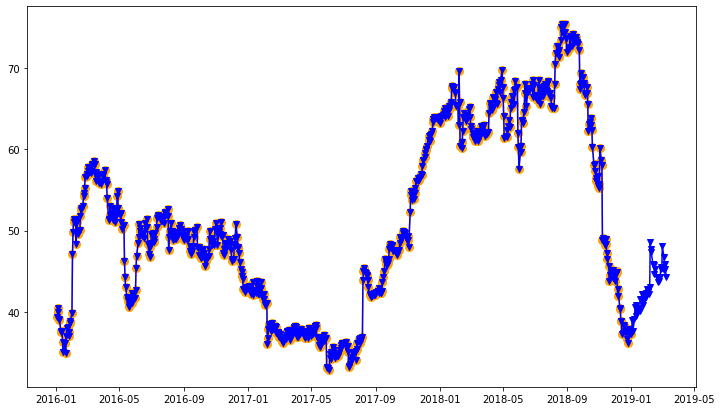

In [67]:
fig, ax = plt.subplots(figsize = [12, 7])
ax.plot('Date', 'Open', data=q4_df[q4_df['clean_symbol'] == 'KORS'], color='orange', marker='o', markersize=8)
ax.plot('Date', 'Open', data=q4_df[q4_df['clean_symbol'] == 'CPRI'], color='blue', marker='v')

## Question 5

**Compare the price histories of GOOG vs GOOGL. Do you notice anything strange? Read the Alphabet, IncLinks to an external site.. Wikipedia page and explain how you would handle these price histories. (8 points)**

Unlike KORS and CPRI, GOOG & GOOGL are both active. The wikipedia cites a restructuring from Google being the owner of Alphabet to Alphabet being the owner of Google. If you own GOOGL, you have Class A stocks and have voting rights. Class B is entirely held by the founders with 10x the voting rights of Class A. Class C is GOOG.

Interestingly the difference is trending towards 0 between the two stocks. I think we leave as is with the data that we have. Taking a peak at the previous close on Jan 5, 2023 there's less than $2 difference with GOOG actually trading higher than GOOGL

In [76]:
q5_df = df[(df['clean_symbol'].isin([ 'GOOG', 'GOOGL'])) & (df['Date'] > '2016-01-01')]
q5_df_pivoted = q5_df.pivot_table(index='Date', columns='Symbol', values='Close').reset_index()
q5_df_pivoted['diff'] = q5_df_pivoted['GOOGL'] - q5_df_pivoted['GOOG']
q5_df_pivoted

Symbol,Date,GOOG,GOOGL,diff
0,2016-01-04,741.84,759.44,17.60
1,2016-01-05,742.58,761.53,18.95
2,2016-01-06,743.62,759.33,15.71
3,2016-01-07,726.39,741.00,14.61
4,2016-01-08,714.47,730.91,16.44
...,...,...,...,...
794,2019-03-04,1147.80,1153.42,5.62
795,2019-03-05,1162.03,1169.19,7.16
796,2019-03-06,1157.86,1164.94,7.08
797,2019-03-07,1143.30,1150.85,7.55


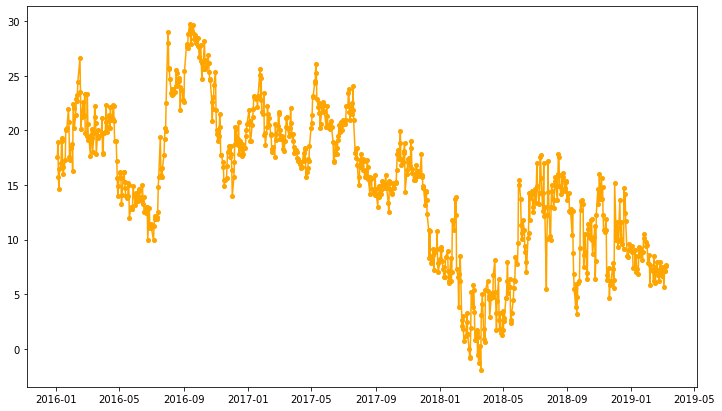

In [78]:
fig, ax = plt.subplots(figsize = [12, 7])
ax.plot('Date', 'diff', data=q5_df_pivoted, color='orange', marker='o', markersize=4)


## Question 6

**Compare the price histories of GOV vs OPI: do you notice anything odd? Read Government Properties Income Trust Announces the Completion of its Merger with Select Income REIT.Links to an external site. Business Wire. (2018, December 31), and spell out how you would handle these price histories. (10 pt)**

This case is interesting. It differs from Q4 in that it's not a rename. It differs from Q5 in that there is a marked difference between the two stocks pre-post merger. 

Based on the lecture we should keep both of these to prevent survivorship bias. Each stock performed differently and since we have no way to guarantee predictions on merger success/fails, or which stocks will end up merging (without news), we should train our algorithm on both of these stocks.

A neat way to remove this data would be to use more recent data but as the lecture said, that introduces it's own host of problems.

All in all, for Q4,5,6 the use-case should determine how we clean this data.

In [119]:
q6_df = df[(df['clean_symbol'].isin([ 'GOV', 'OPI'])) & (df['Date'] > '2016-01-01')]
q6_df_pivoted = q6_df.pivot_table(index='Date', columns='Symbol', values='Close').reset_index()
q6_df_pivoted['diff'] = q6_df_pivoted['OPI'] - q6_df_pivoted['GOV']
q6_df_pivoted['avg'] = (q6_df_pivoted['OPI'] + q6_df_pivoted['GOV'])/2
q6_df_pivoted

Symbol,Date,GOV,OPI,diff,avg
0,2016-01-04,11.246081,44.204084,32.958003,27.725082
1,2016-01-05,11.700320,45.989526,34.289206,28.844923
2,2016-01-06,11.495180,45.183197,33.688018,28.339189
3,2016-01-07,11.084899,43.570540,32.485641,27.327720
4,2016-01-08,10.718577,42.130668,31.412091,26.424623
...,...,...,...,...,...
795,2019-03-04,NaN,27.980000,NaN,NaN
796,2019-03-05,NaN,28.070000,NaN,NaN
797,2019-03-06,NaN,27.500000,NaN,NaN
798,2019-03-07,NaN,26.500000,NaN,NaN


In [130]:
#calc moving averages
q6_df_pivoted['rolling_10dy_OPI'] = q6_df_pivoted['OPI'].rolling(10).mean()
q6_df_pivoted['rolling_10dy_GOV'] = q6_df_pivoted['GOV'].rolling(10).mean()


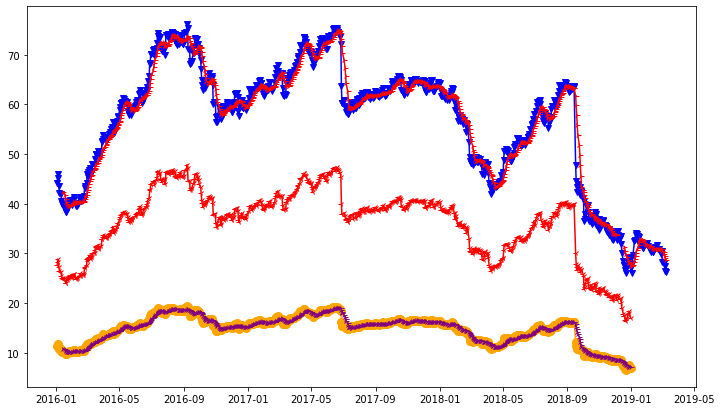

In [132]:
fig, ax = plt.subplots(figsize = [12, 7])
ax.plot('Date', 'GOV', data=q6_df_pivoted, color='orange', marker='o', markersize=8)
ax.plot('Date', 'OPI', data=q6_df_pivoted, color='blue', marker='v')
ax.plot('Date', 'avg', data=q6_df_pivoted, color='red', marker='3')
ax.plot('Date', 'rolling_10dy_OPI', data=q6_df_pivoted, color='red', marker='4')
ax.plot('Date', 'rolling_10dy_GOV', data=q6_df_pivoted, color='purple', marker='4')

## Question 7 

**When you have a company that issues two classes of stocks (e.g., BF.A and BF.B), should you include both classes in your data? Discuss when it is a good idea to include them both and when you should not. (10 points)**

Both should be included. Sometimes there might be a large price difference that warrants buying one share over another. Or there might be upcoming news that drastically affects the price. Like if Google announced their Class B shares are going to be up for sale or Class B shares will become Class A shares, then Class C shares would tank drastically I bet. 

If for some reason, the different classes are going to move in tandem forever, then it might not matter.

If dividends matter then both should be included. 

If speed matters, both should be included. Trade speed (volume) for profit. 

## Question 8

**What is “survivorship bias” with respect to a stock database? If I claim that this dataset represents US stocks with the top 1,000 market capitalization, does it have survivorship bias? Devise a simple method to find out. (10 points)**

Survivorship bias with respect to a stock database would be a database consisting only of stocks still listed on the exchange.

A simple method would be from the leture just check for dead stocks like Lehman or Enron.

For this dataset it should be simple enough to check with the code below. Since it returns 127 dead stocks, we should be able to assume it doesn't have survivorship bias

Another way would be to fire off a quick check for each ticker and see if any dead ones are included.


In [144]:
grouped = df.groupby(['Symbol'])['Date'].max().reset_index()
grouped.rename(columns={'Date':'Stock_Max_Date'}, inplace=True)
grouped['db_max_date'] = df['Date'].max()
grouped['dead_or_alive'] = np.where(grouped['Stock_Max_Date'] < grouped['db_max_date'],
                                    "Dead",
                                    "Alive")
grouped[grouped['dead_or_alive'] == 'Dead']


,Symbol,Stock_Max_Date,db_max_date,dead_or_alive
8,ABCD',2018-12-18,2019-03-08,Dead
19,ACTA',2018-04-19,2019-03-08,Dead
20,ACXM',2018-10-01,2019-03-08,Dead
30,AFSI',2018-11-29,2019-03-08,Dead
34,AHL,2019-02-14,2019-03-08,Dead
...,...,...,...,...
1026,WR,2018-06-04,2019-03-08,Dead
1038,WYN,2018-05-31,2019-03-08,Dead
1042,XCRA',2018-10-01,2019-03-08,Dead
1044,XL',2018-09-13,2019-03-08,Dead
